## 필요한 라이브러리 로드 및 데이터 불러오기

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')


In [3]:
lin_data

,input,pollution
0,0.240557,4.858750
1,0.159731,4.471091
2,0.108295,4.341897
3,0.233770,3.586844
4,0.283235,3.678243
...,...,...
95,0.070824,4.851617
96,0.055300,4.912696
97,0.138229,5.516441
98,0.007205,5.661260


## 시각화

<AxesSubplot:xlabel='input', ylabel='pollution'>

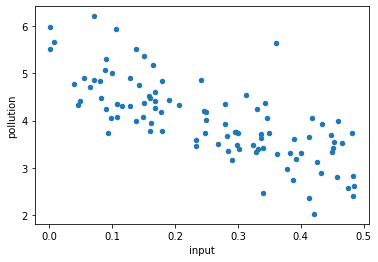

In [4]:
# 투입량을 늘리면 오염도가 줄어드는 경향이 있는 것을 확인할 수 있음
lin_data.plot.scatter(x='input', y='pollution')

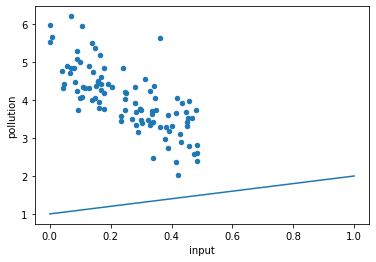

In [5]:
w, b = 1, 1
x0, x1 = 0.0, 1.0
def h(x, w, b):
    return w*x + b

lin_data.plot.scatter(x='input', y='pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

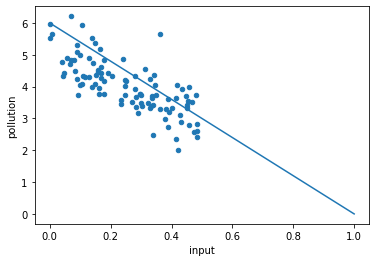

In [6]:
# 데이터와 일치시키기 위해서는 음수 기울기가 필요
w, b = -6, 6
x0, x1 = 0.0, 1.0
def h(x, w, b):
    return w*x + b

lin_data.plot.scatter(x='input', y='pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

In [7]:
# 평균 제곱 오차
import numpy as np

y_hat = np.array([1.2, 2.1, 2.9, 4.1, 4.7, 6.3, 7.1, 7.7, 8.5, 10.1])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
diff_square = (y_hat - y)**2
e_mse = diff_square.sum() / len(y)
e_mse

0.06099999999999996

In [8]:
# sklearn 역시 오차 계산을 지원함
from sklearn.metrics import mean_squared_error as mse
print('Mean squared error:', mse(y_hat, y))

Mean squared error: 0.06099999999999996


In [9]:
# 평균 절대 오차 - 오차를 제곱하지 않고 절대 값을 취해 더하는 것
from sklearn.metrics import mean_absolute_error
print('Mean absolute error:', mean_absolute_error(y_hat, y))

Mean absolute error: 0.20999999999999988


In [64]:
# w와 평균제곱오차를 출력
x = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w_list = np.arange(1.0, 0.2, -0.1)
for w in list(w_list):
    y_hat = w * x
    print('w = {:.1f}, 평균 제곱 오차: {:.2f}'.format(w, mse(y_hat, y)))


w = 1.0, 평균 제곱 오차: 23.08
w = 0.9, 평균 제곱 오차: 15.86
w = 0.8, 평균 제곱 오차: 10.13
w = 0.7, 평균 제곱 오차: 5.89
w = 0.6, 평균 제곱 오차: 3.13
w = 0.5, 평균 제곱 오차: 1.85
w = 0.4, 평균 제곱 오차: 2.06
w = 0.3, 평균 제곱 오차: 3.75


## 도전문제 4.1

In [57]:
''' 
1. w를 1.0에서 0.0까지 0.1씩 감소시켜가며 평균 제곱 오차값의 변화를 
그래프로 그리도록 하자.
2. 평균 제곱 오차값이 가장 작을 때의 w를 기울기로 가지는 직선을
주어진 점과 함께 그려보도록 하자.
'''

w_list = np.arange(1.0, 0.0, -0.1)
for w in list(w_list):
    y_hat = w * x



In [67]:
list(w_list)

[1.0,
 0.9,
 0.8,
 0.7000000000000001,
 0.6000000000000001,
 0.5000000000000001,
 0.40000000000000013,
 0.30000000000000016]

In [59]:
df = pd.DataFrame(w_list)
df

,0
0,1.0
1,0.9
2,0.8
3,0.7
4,0.6
5,0.5
6,0.4
7,0.3
8,0.2
9,0.1


KeyError: -0.8999999999999995

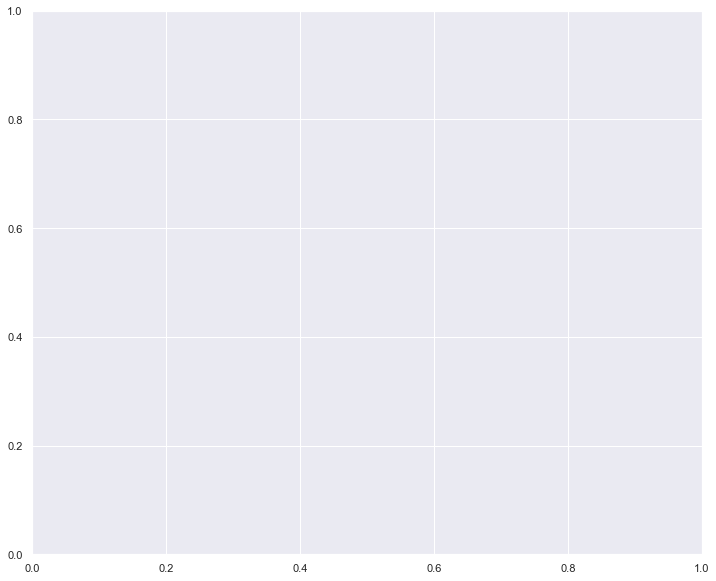

In [47]:
.plot.scatter(w, e_mse)

## 오차로 가설을 평가하고 좋은 가설 찾기

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')

def h(x, w, b):
    return w*x + b

w, b = -3, 6

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
y_pred = h(x, w, b)
error = (y_pred - y)
error

array([ 0.4195784 ,  1.04971677,  1.33321941,  1.71184524,  1.47205094,
        1.29651981,  0.90796599,  1.60479092,  0.43274803,  1.34273875,
        1.04704019,  0.17173389,  1.62983969,  2.71606203,  0.76239547,
        0.81910416,  1.68277334,  1.84517464,  1.83123493,  1.05999343,
        1.54915161,  1.62613855,  1.35757149,  0.9559527 ,  0.69384839,
        1.43756403,  1.00967404,  0.68616603,  1.73449862,  1.23144237,
        2.00034361,  1.34951392,  0.32087407, -0.2647334 ,  1.97698033,
        1.18131751,  1.72325619,  1.80163473, -0.42384495,  1.27631632,
        1.07877757,  0.64225129,  1.22905797,  1.07590731,  1.55013999,
        0.76691574,  1.67240252,  1.10559534,  1.27540987, -0.73003295,
        1.27263587,  1.63061935,  1.35614568,  1.58218579,  2.39535838,
        1.48261159,  1.524646  ,  1.60174464,  0.47302039,  1.09862732,
        1.22260149,  1.56899704,  0.02277376,  2.1449076 ,  1.47727095,
        1.8862379 ,  1.21790966,  2.51660705,  1.23173843,  0.61

In [12]:
# 벡터화 연산
learning_rate = 0.005
w = w - learning_rate * (error * x).sum()
b = b - learning_rate * error.sum()
w, b

(-3.1695697708211927, 5.391417713594717)

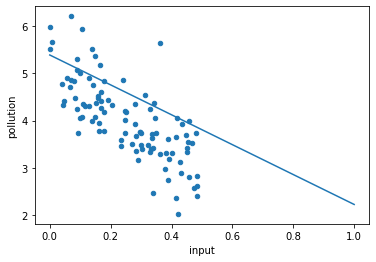

In [13]:
lin_data.plot.scatter('input', 'pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

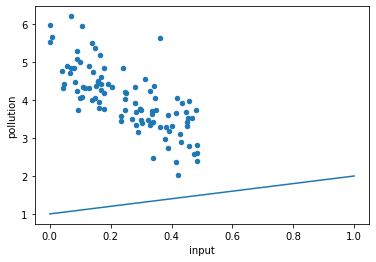

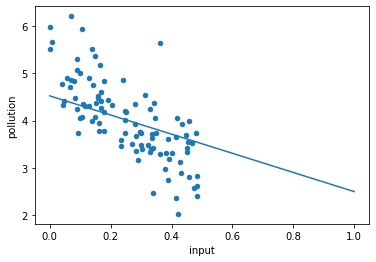

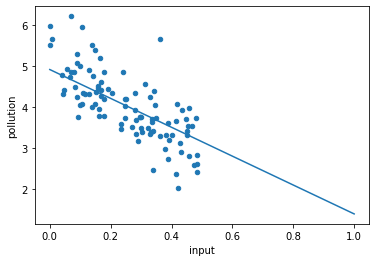

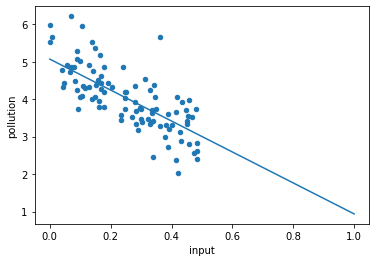

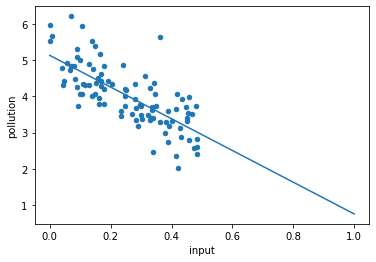

In [14]:
# # 오차가 점점 줄어들면 회귀 직선이 데이터를 점점 더 정확하게 모델링
def h(x, param):
       return param[0]*x + param[1]

learning_iteration = 1000 # 하이퍼파라미터 : 학습반복 횟수
learning_rate = 0.0025    # 하이퍼파라미터 : 학습율로 0.05, 0.001등이 가능

param = [1, 1] # w, b

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()

for i in range(learning_iteration):
    if i % 200 == 0:
        lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
        plt.plot([0, 1], [h(0, param), h(1, param)])
    error = ( h(x, param) - y )
    param[0] -= learning_rate * (error * x).sum()
    param[1] -= learning_rate * error.sum()

In [15]:
from sklearn import linear_model
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
x = x[:, np.newaxis] # 선형 회귀 모델의 입력 형식에 맞게 차원을 증가시킴
print(x)

[[0.24055707]
 [0.1597306 ]
 [0.10829455]
 [0.23377033]
 [0.28323537]
 [0.12808583]
 [0.34549075]
 [0.33271329]
 [0.09001426]
 [0.11620483]
 [0.20601359]
 [0.15000132]
 [0.39294774]
 [0.4209191 ]
 [0.33071579]
 [0.48175618]
 [0.26858081]
 [0.2328081 ]
 [0.45704999]
 [0.24569785]
 [0.38236759]
 [0.29856761]
 [0.29944705]
 [0.44841195]
 [0.09896587]
 [0.04793845]
 [0.15920226]
 [0.41791947]
 [0.16082931]
 [0.24851334]
 [0.47514699]
 [0.29708178]
 [0.1653657 ]
 [0.10529827]
 [0.0932346 ]
 [0.15023707]
 [0.48271145]
 [0.28364396]
 [0.07020281]
 [0.17768318]
 [0.46604517]
 [0.45860857]
 [0.27905958]
 [0.16777949]
 [0.32352937]
 [0.4329887 ]
 [0.32825247]
 [0.03894147]
 [0.33719318]
 [0.36048117]
 [0.08236935]
 [0.36232547]
 [0.33608776]
 [0.13852276]
 [0.41330502]
 [0.14950648]
 [0.24760616]
 [0.10715455]
 [0.00153907]
 [0.45324442]
 [0.16725705]
 [0.16088719]
 [0.00066376]
 [0.48323703]
 [0.0902836 ]
 [0.3775714 ]
 [0.3501837 ]
 [0.33927998]
 [0.45179427]
 [0.17890406]
 [0.16829187]
 [0.24

In [16]:
regr = linear_model.LinearRegression()
regr.fit(x, y) # 선형 회귀 모델에 데이터를 넣어 학습을 진행

LinearRegression()

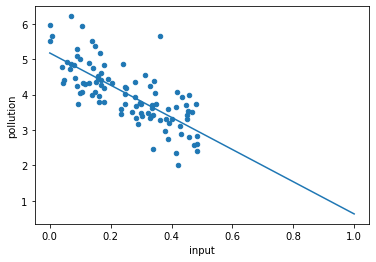

In [17]:
# 입력으로 0과 1을 주고 이에 해당하는 출력 값을 예측
lin_data.plot.scatter('input', 'pollution')
y_pred = regr.predict([[0], [1]])
plt.plot([0,1], y_pred) # x 구간을 0에서 1 사이로 두기

In [18]:
'''
편향을 파라미터로 다루기 위해 numpy의 c_()를 이용하여 
100개의 행을 가지고 각 행마다 1을 원소로 하는 벡터를 생성해
입력 데이터에 병합
'''
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
x = x[:, np.newaxis]
X = np.c_[np.ones((100, 1)), x]
print(X)

[[1.00000000e+00 2.40557071e-01]
 [1.00000000e+00 1.59730598e-01]
 [1.00000000e+00 1.08294551e-01]
 [1.00000000e+00 2.33770334e-01]
 [1.00000000e+00 2.83235375e-01]
 [1.00000000e+00 1.28085826e-01]
 [1.00000000e+00 3.45490753e-01]
 [1.00000000e+00 3.32713292e-01]
 [1.00000000e+00 9.00142565e-02]
 [1.00000000e+00 1.16204832e-01]
 [1.00000000e+00 2.06013589e-01]
 [1.00000000e+00 1.50001317e-01]
 [1.00000000e+00 3.92947744e-01]
 [1.00000000e+00 4.20919103e-01]
 [1.00000000e+00 3.30715790e-01]
 [1.00000000e+00 4.81756183e-01]
 [1.00000000e+00 2.68580809e-01]
 [1.00000000e+00 2.32808098e-01]
 [1.00000000e+00 4.57049987e-01]
 [1.00000000e+00 2.45697851e-01]
 [1.00000000e+00 3.82367589e-01]
 [1.00000000e+00 2.98567613e-01]
 [1.00000000e+00 2.99447048e-01]
 [1.00000000e+00 4.48411946e-01]
 [1.00000000e+00 9.89658723e-02]
 [1.00000000e+00 4.79384512e-02]
 [1.00000000e+00 1.59202264e-01]
 [1.00000000e+00 4.17919473e-01]
 [1.00000000e+00 1.60829312e-01]
 [1.00000000e+00 2.48513337e-01]
 [1.000000

In [19]:
# numpy의 선형대수 서브 모듈인 linalg를 이용
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([ 5.17550358, -4.54449866])

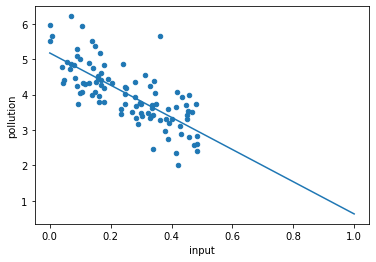

In [20]:
def h(x, theta): # 가설 함수
    return x*theta[1] + theta[0]

# 데이터와 가설을 비교
lin_data.plot.scatter('input', 'pollution') # 데이터
plt.plot([0, 1], [h(0, theta), h(1, theta)]) # 가설


# 다변량 선형 회귀 분석을 위한 데이터 확보하기
## kaggle data 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [22]:
life = life[['Life expectancy', 'Year', 'Alcohol',
           'Percentage expenditure', 'Total expenditure',
           'Hepatitis B', 'Measles', 'Polio', 'BMI', 'GDP',
           'Thinness 1-19 years', 'Thinness 5-9 years']]
print(life)

      Life expectancy  Year  Alcohol  Percentage expenditure  \
0                65.0  2015     0.01               71.279624   
1                59.9  2014     0.01               73.523582   
2                59.9  2013     0.01               73.219243   
3                59.5  2012     0.01               78.184215   
4                59.2  2011     0.01                7.097109   
...               ...   ...      ...                     ...   
2933             44.3  2004     4.36                0.000000   
2934             44.5  2003     4.06                0.000000   
2935             44.8  2002     4.43                0.000000   
2936             45.3  2001     1.72                0.000000   
2937             46.0  2000     1.68                0.000000   

      Total expenditure  Hepatitis B  Measles  Polio   BMI         GDP  \
0                  8.16         65.0     1154    6.0  19.1  584.259210   
1                  8.18         62.0      492   58.0  18.6  612.696514   
2        

In [23]:
print(life.shape)
life.isnull().sum()

(2938, 12)


Life expectancy            10
Year                        0
Alcohol                   194
Percentage expenditure      0
Total expenditure         226
Hepatitis B               553
Measles                     0
Polio                      19
BMI                        34
GDP                       448
Thinness 1-19 years        34
Thinness 5-9 years         34
dtype: int64

In [24]:
life.dropna(inplace=True)
print(life.shape)

(1853, 12)


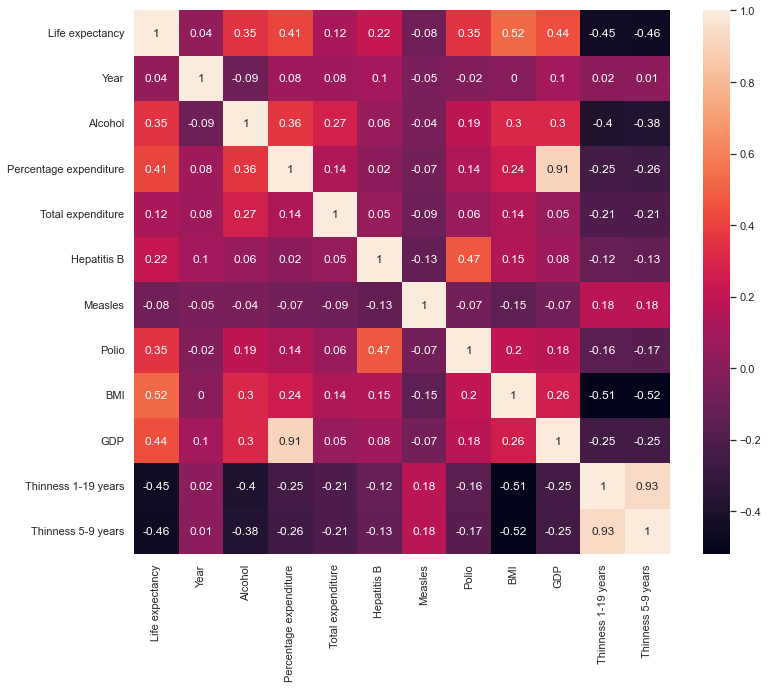

In [25]:
# corr() 함수를 사용하여 상관행렬(correlation matrix) 형성
sns.set(rc={'figure.figsize':(12,10)})    # 상관행렬 가시
correlation_matrix = life.corr().round(2) # 상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

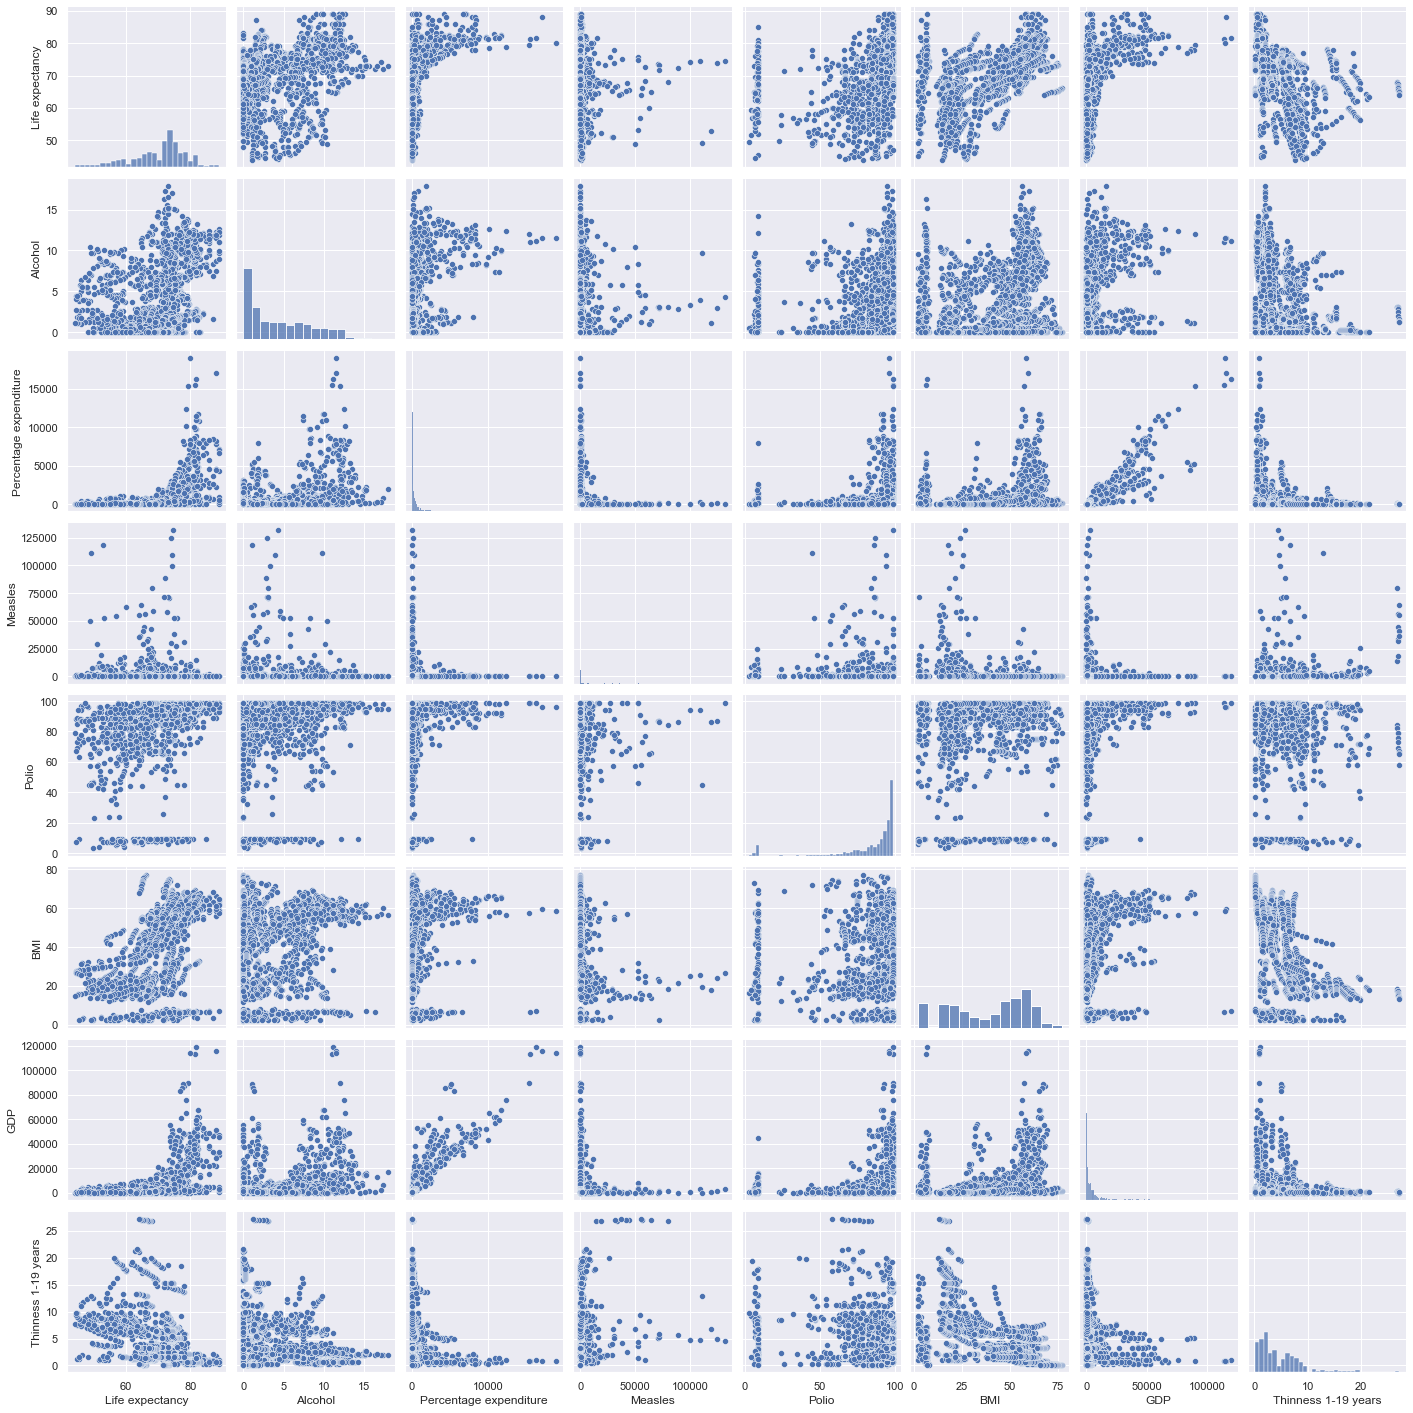

In [26]:
# seaborn의 pair plot으로 확인
sns.pairplot(life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']])
plt.show()

In [27]:
'''
X - 기대 수명을 예측하는 데에 사용할 특징 값 데이터들로 이루어진 행렬
y - 레이블, 기대수명
'''
X = life[['Alcohol', 'Percentage expenditure', 'Polio',
         'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']
print(X)
print(y)

      Alcohol  Percentage expenditure  Polio   BMI         GDP  \
0        0.01               71.279624    6.0  19.1  584.259210   
1        0.01               73.523582   58.0  18.6  612.696514   
2        0.01               73.219243   62.0  18.1  631.744976   
3        0.01               78.184215   67.0  17.6  669.959000   
4        0.01                7.097109   68.0  17.2   63.537231   
...       ...                     ...    ...   ...         ...   
2933     4.36                0.000000   67.0  27.1  454.366654   
2934     4.06                0.000000    7.0  26.7  453.351155   
2935     4.43                0.000000   73.0  26.3   57.348340   
2936     1.72                0.000000   76.0  25.9  548.587312   
2937     1.68                0.000000   78.0  25.5  547.358878   

      Thinness 1-19 years  
0                    17.2  
1                    17.5  
2                    17.7  
3                    17.9  
4                    18.2  
...                   ...  
2933       

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

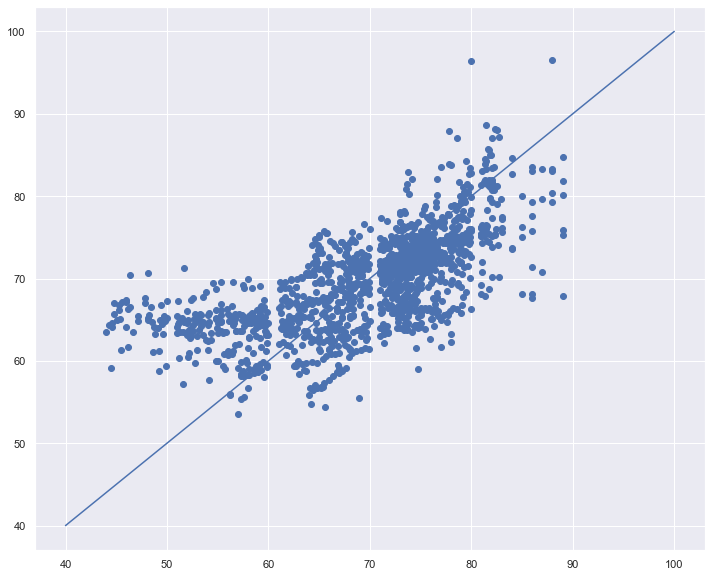

In [30]:
# 학습으로 얻은 함수가 내어 놓는 출력을 예측
# 기울기가 1인 직선에 가까울수록 예측과 정답이 일치하는 것
y_hat_train = lin_model.predict(X_train) # 훈련용 데이터에 대한 예측치
plt.scatter(y_train, y_hat_train)
xy_range = [40, 100]
plt.plot(xy_range, xy_range)

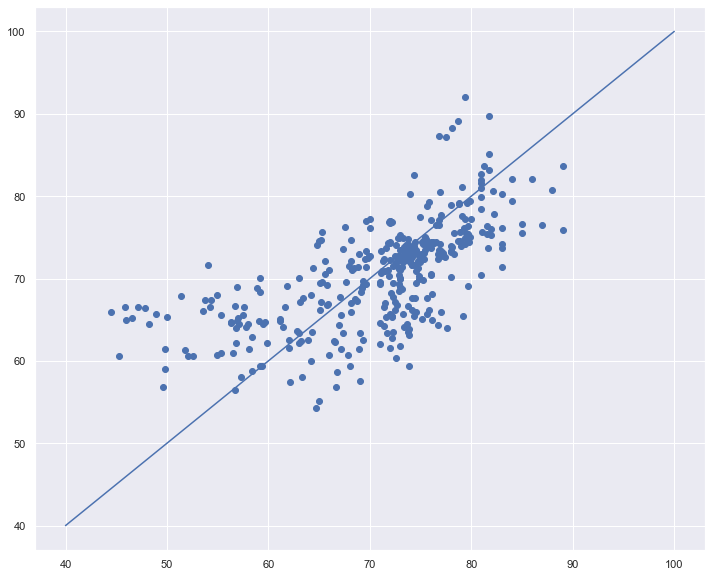

In [31]:
# 이 함수가 다른 데이터에도 잘 동작하는지 확인
y_hat_test = lin_model.predict(X_test)

plt.scatter(y_test, y_hat_test)  # 검증 데이터와 예측 데이터의 산포도
plt.plot(xy_range, xy_range)  # (40,40)에서 (10,100)으로 직선
                              #   - 데이터가 이 직선과 일치할수록 예측이 정확


In [32]:
# 평균 제곱오차 구하기
from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

Mean squared error: 42.43841343908639


In [33]:
# 정규화 후 모든 데이터는 0에서 1 사이의 값
from sklearn.preprocessing import normalize

n_X = normalize(X, axis = 0)

In [34]:
nXtrain, nXtest, y_train, y_test = train_test_split(n_X, y, test_size=0.2)
lin_model.fit(nXtrain, y_train)

LinearRegression()

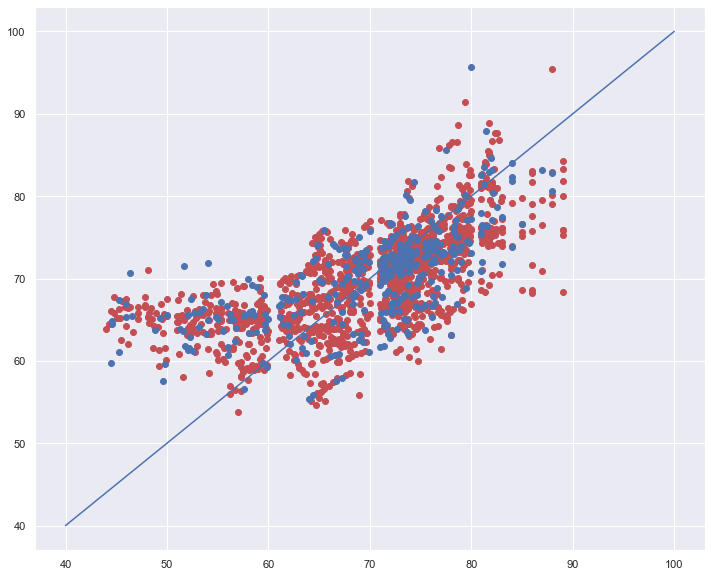

In [35]:
y_hat_train = lin_model.predict(nXtrain)
y_hat_test = lin_model.predict(nXtest)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot(xy_range, xy_range)

In [36]:
from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

Mean squared error: 45.57390833115605


(array([[1744.,  109.,    0.,    0.,    0.],
        [1757.,   63.,   24.,    4.,    5.],
        [1853.,    0.,    0.,    0.,    0.],
        [1853.,    0.,    0.,    0.,    0.],
        [1727.,  109.,   10.,    5.,    2.],
        [1740.,  102.,   11.,    0.,    0.]]),
 array([0.        , 0.04591209, 0.09182417, 0.13773626, 0.18364835,
        0.22956043]),
 <a list of 6 BarContainer objects>)

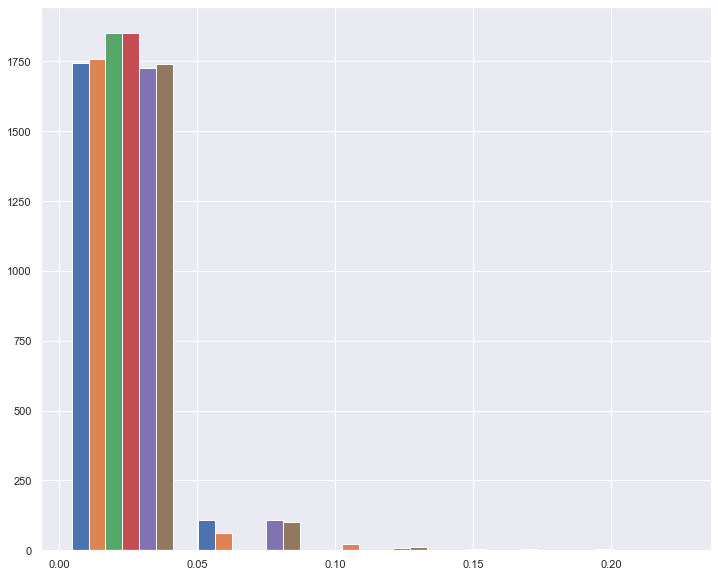

In [37]:
plt.hist(n_X, bins=5)

(array([[ 449., 1306.,   98.,    0.,    0.],
        [   0., 1765.,   72.,   11.,    5.],
        [ 179., 1674.,    0.,    0.,    0.],
        [ 452., 1399.,    2.,    0.,    0.],
        [   0., 1733.,  108.,    8.,    4.],
        [ 123., 1622.,   97.,   11.,    0.]]),
 array([-3.77113931, -0.94886312,  1.87341306,  4.69568924,  7.51796543,
        10.34024161]),
 <a list of 6 BarContainer objects>)

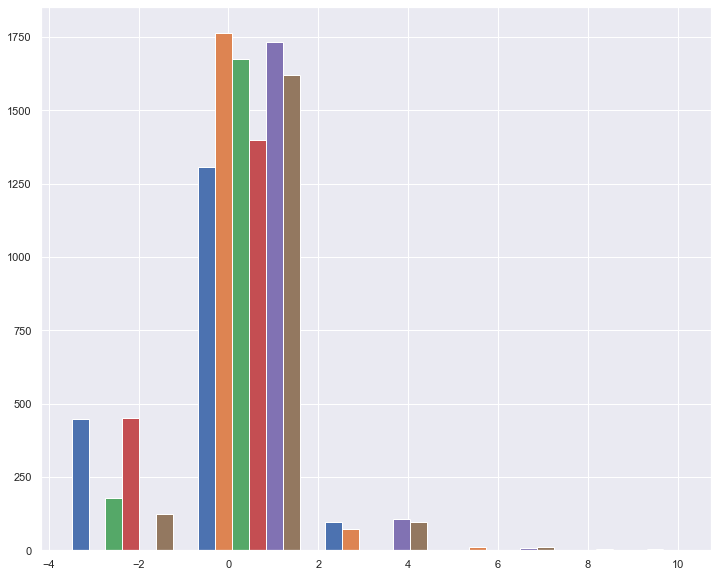

In [38]:
# fit_transform() 메소드에 표준화를 할 데이터를 주면 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
s_X = scaler.fit_transform(X)
plt.hist(s_X, bins=5)

In [39]:
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2)

sXtrain = scaler.fit_transform(Xtrain)
sXtest = scaler.fit_transform(Xtest)

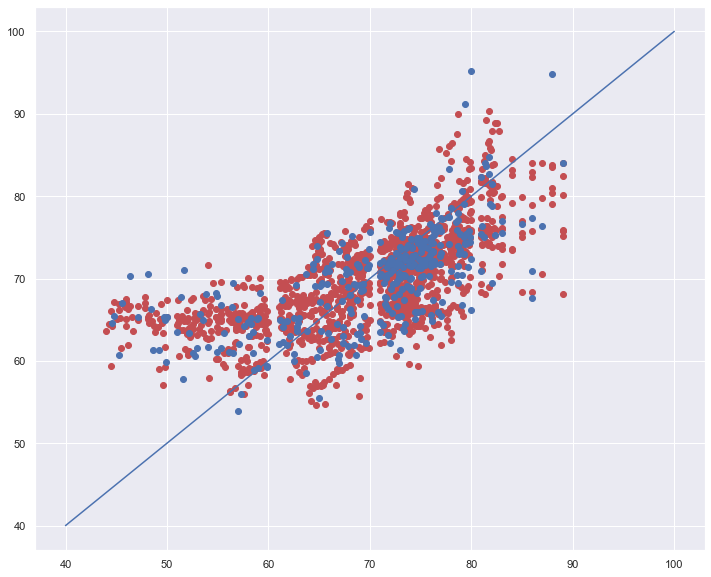

In [40]:

lin_model = LinearRegression()
lin_model.fit(sXtrain, y_train)
y_hat_train = lin_model.predict(sXtrain)
y_hat_test = lin_model.predict(sXtest)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot(xy_range, xy_range)

# 학습을 통하여 X_test에 대한 예측이 가진 오차가 점점 줄어드는 것을 확인할 수 있었습니다.

In [41]:
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

Mean squared error: 41.61182802460195
